# Iris

Forked from https://www.vertica.com/python/examples/iris/index.php

Updated to run with iris.csv, rather than working with pre-defined example
DSN set as local VM testing machine

<ul class="ul_content">
    <li><b>PetalLengthCm: </b>Petal Length in cm</li>
    <li><b>PetalWidthCm: </b>Petal Width in cm</li>
    <li><b>SepalLengthCm: </b>Sepal Length in cm</li>
    <li><b>SepalWidthCm: </b>Sepal Width in cm</li>
    <li><b>Species: </b>The Flower Species (Setosa, Virginica, Versicolor)</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

Let's create a Virtual DataFrame of the dataset.

In [1]:
from verticapy.connections.connect import *
new_auto_connection({"host": "192.168.56.201", 
                     "port": "5433", 
                     "database": "dw", 
                     "password": "vertica_4U", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
change_auto_connection("VerticaDSN")

,"123idNumeric(3,0)",123Sepal_LengthFloat,123Sepal_WidthFloat,123Petal_LengthFloat,123Petal_WidthFloat,AbcSpeciesVarchar(10)
1,1.0,5.1,3.5,1.4,0.2,setosa
2,2.0,4.9,3.0,1.4,0.2,setosa
3,3.0,4.7,3.2,1.3,0.2,setosa
4,4.0,4.6,3.1,1.5,0.2,setosa
5,5.0,5.0,3.6,1.4,0.2,setosa
6,6.0,5.4,3.9,1.7,0.4,setosa
7,7.0,4.6,3.4,1.4,0.3,setosa
8,8.0,5.0,3.4,1.5,0.2,setosa
9,9.0,4.4,2.9,1.4,0.2,setosa
10,10.0,4.9,3.1,1.5,0.1,setosa

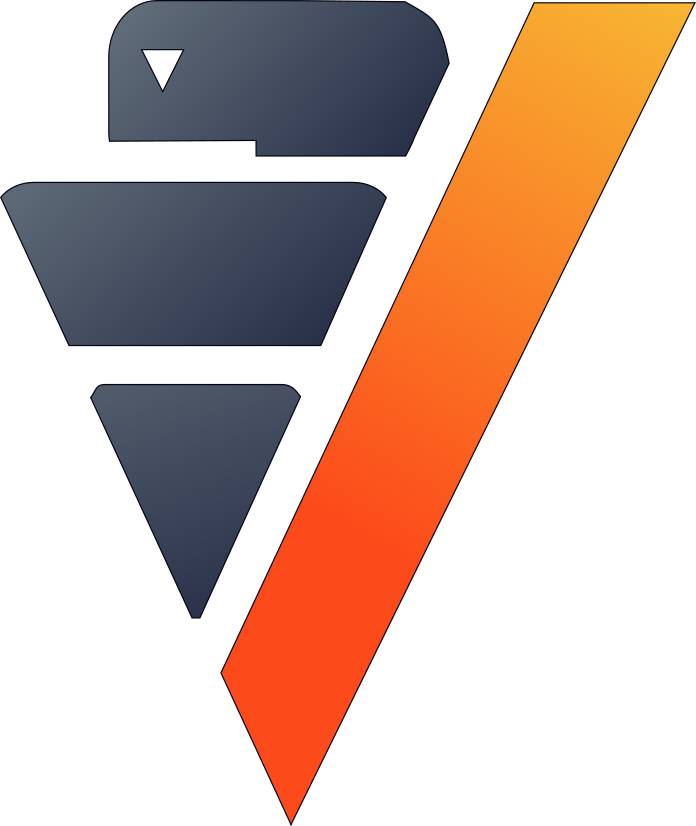

In [2]:
from verticapy import *
iris = vDataFrame("iris")
display(iris)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,dtype,unique,count,top,top_percent
"""id""","numeric(3,0)",150,150,1.0,0.667
"""Sepal_Length""",float,35,150,5.0,6.667
"""Sepal_Width""",float,23,150,3.0,17.333
"""Petal_Length""",float,43,150,1.5,8.667
"""Petal_Width""",float,22,150,0.2,19.333
"""Species""",varchar(10),3,150,setosa,33.333

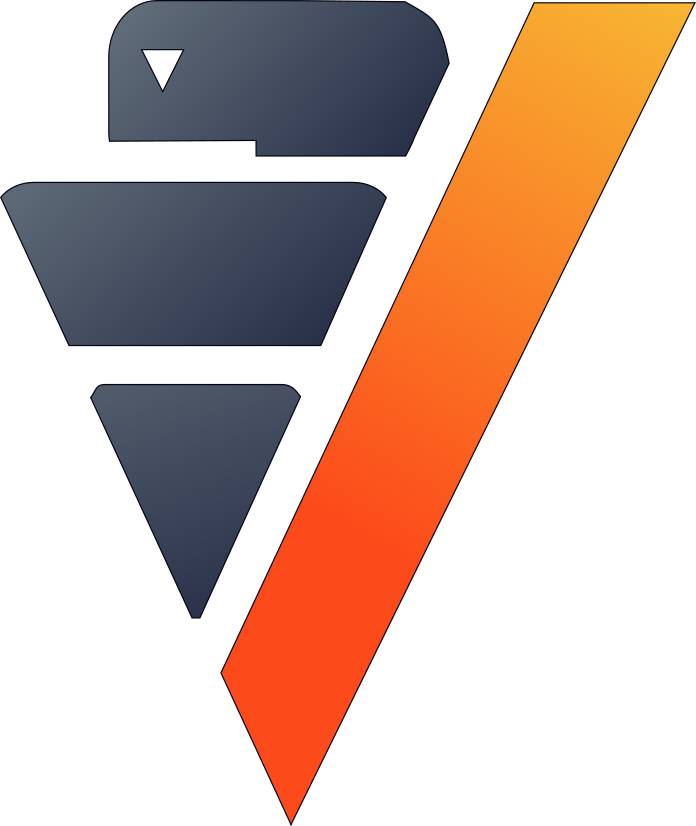

In [3]:
iris.describe(method = "categorical")

We don't have much data here, but luckily, different flower species have different proportions, so let's start by making ratios.

We'll need to use the One Hot Encoder on the 'Species' to get information about each species.

In [4]:
iris["Species"].get_dummies(drop_first = False )
iris["ratio_pwl"] = iris["Petal_Width"] / iris["Petal_Length"]
iris["ratio_swl"] = iris["Sepal_Width"] / iris["Sepal_Length"]

We can draw the correlation matrix (Pearson correlation coefficient) of the new features to see if there are some linear links.

,"""id""","""Sepal_Length""","""Sepal_Width""","""Petal_Length""","""Petal_Width""","""Species_setosa""","""Species_versicolor""","""Species_virginica""","""ratio_pwl""","""ratio_swl"""
"""id""",1.0,0.716676272853919,-0.402300987195739,0.882636520983482,0.900027392868955,-0.816514725901026,0.0,0.816514725901026,0.799920529172525,-0.754686421006222
"""Sepal_Length""",0.716676272853919,1.0,-0.117569784133026,0.871753775886597,0.817941126271589,-0.717415668686114,0.0793955238434455,0.638020144842662,0.646180004304006,-0.725319313068084
"""Sepal_Width""",-0.402300987195739,-0.117569784133026,1.0,-0.428440104330571,-0.366125932536459,0.60334782734908,-0.467703081991824,-0.135644745357259,-0.357194562515221,0.759621572340933
"""Petal_Length""",0.882636520983482,0.871753775886597,-0.428440104330571,1.0,0.962865431402795,-0.922765384703653,0.201754452578933,0.721010932124716,0.814533209942063,-0.868498563839725
"""Petal_Width""",0.900027392868955,0.817941126271589,-0.366125932536459,0.962865431402795,1.0,-0.88734369661146,0.117898812836487,0.769444883774971,0.91188326511895,-0.798994840881984
"""Species_setosa""",-0.816514725901026,-0.717415668686114,0.60334782734908,-0.922765384703653,-0.88734369661146,1.0,-0.5,-0.5,-0.825790137630624,0.908554954625582
"""Species_versicolor""",0.0,0.0793955238434455,-0.467703081991824,0.201754452578933,0.117898812836487,-0.5,1.0,-0.5,0.211464537815313,-0.410766580481539
"""Species_virginica""",0.816514725901026,0.638020144842662,-0.135644745357259,0.721010932124716,0.769444883774971,-0.5,-0.5,1.0,0.614325599815311,-0.497788374144046
"""ratio_pwl""",0.799920529172525,0.646180004304006,-0.357194562515221,0.814533209942063,0.91188326511895,-0.825790137630624,0.211464537815313,0.614325599815311,1.0,-0.699273457474037
"""ratio_swl""",-0.754686421006222,-0.725319313068084,0.759621572340933,-0.868498563839725,-0.798994840881984,0.908554954625582,-0.410766580481539,-0.497788374144046,-0.699273457474037,1.0

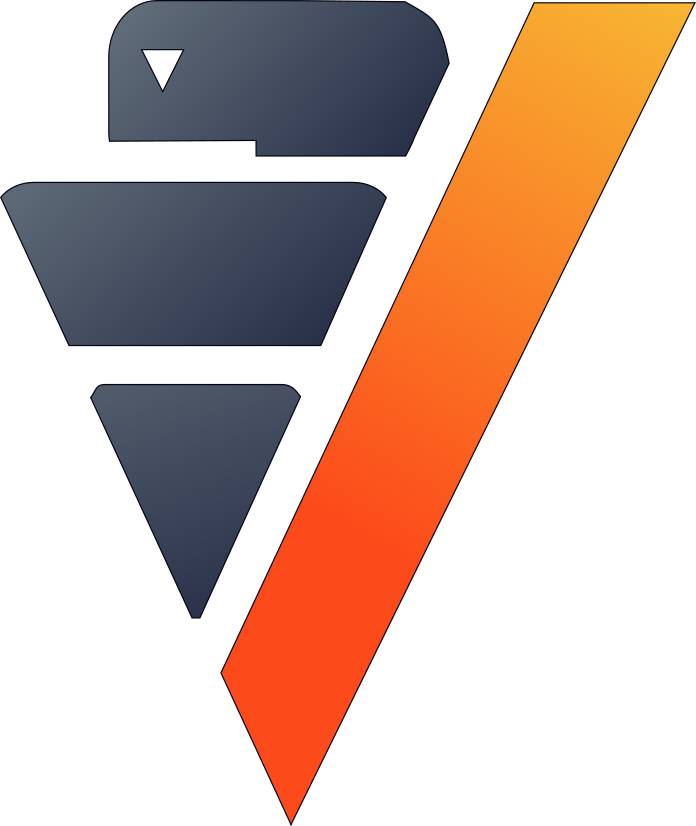

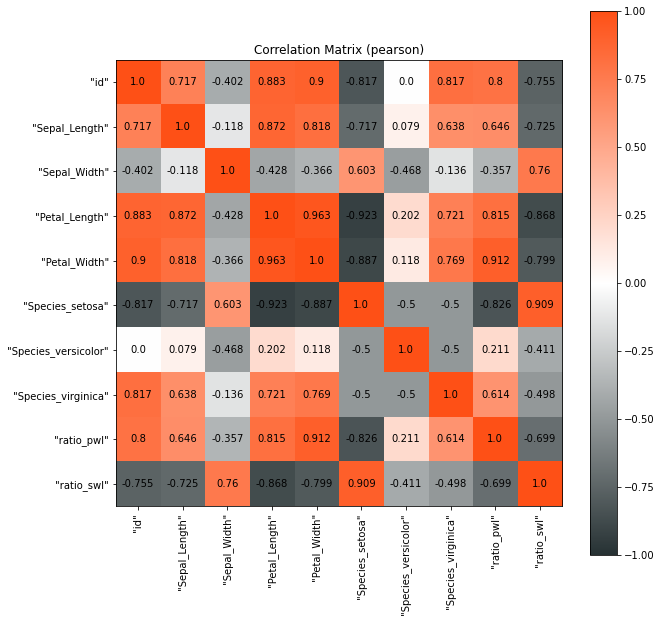

In [5]:
%matplotlib inline
iris.corr()

The Iris Setosa is highly linearly correlated with the petal length and the sepal ratio. We can see a perfect separation using the two features (though we can also see this separation the petal length alone).

<AxesSubplot:xlabel='"Petal_Length"', ylabel='"ratio_swl"'>

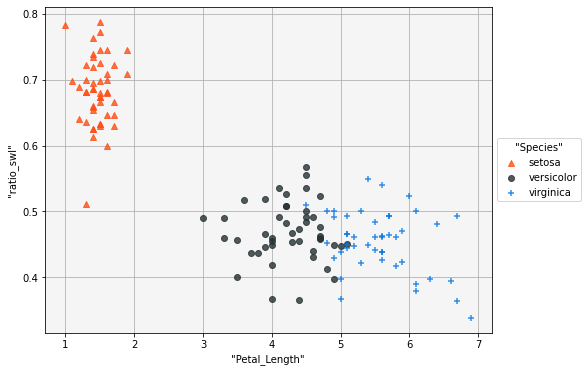

In [6]:
iris.scatter(columns = ["Petal_Length", "ratio_swl"], 
             catcol = "Species")

We can we a clear linear separation between the Iris versicolor and the Iris virginica, but we'll need more features to identify other species.

<Axes3DSubplot:xlabel='"Petal_Length"', ylabel='"Petal_Width"'>

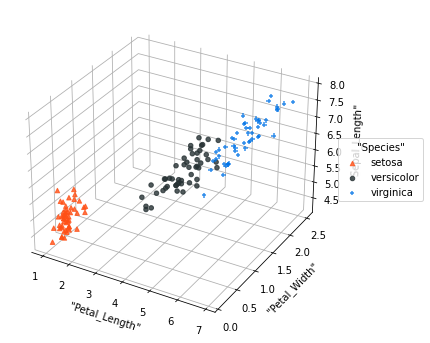

In [7]:
iris.scatter(columns = ["Petal_Length", 
                        "Petal_Width", 
                        "Sepal_Length"], 
             catcol = "Species")

Our strategy is simple: we'll use two Linear SVCs: one to classify the Iris setosa first and one to classify the Iris versicolor.

## Machine Learning

Let's build the first Linear SVC to predict if a flower is an Iris setosa.

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi
1-fold,0.9999999999999999,1.0,1.0,0.0775074964627228,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2-fold,1.0,0.9999999999999999,1.0,0.0885454571642568,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3-fold,1.0,1.0,1.0,0.0802075911867055,1.0,1.0,1.0,1.0,1.0,1.0,1.0
avg,1.0,1.0,1.0,0.08208684827122836,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,6.409875621278546e-17,6.409875621278546e-17,0.0,0.0057539420838629615,0.0,0.0,0.0,0.0,0.0,0.0,0.0

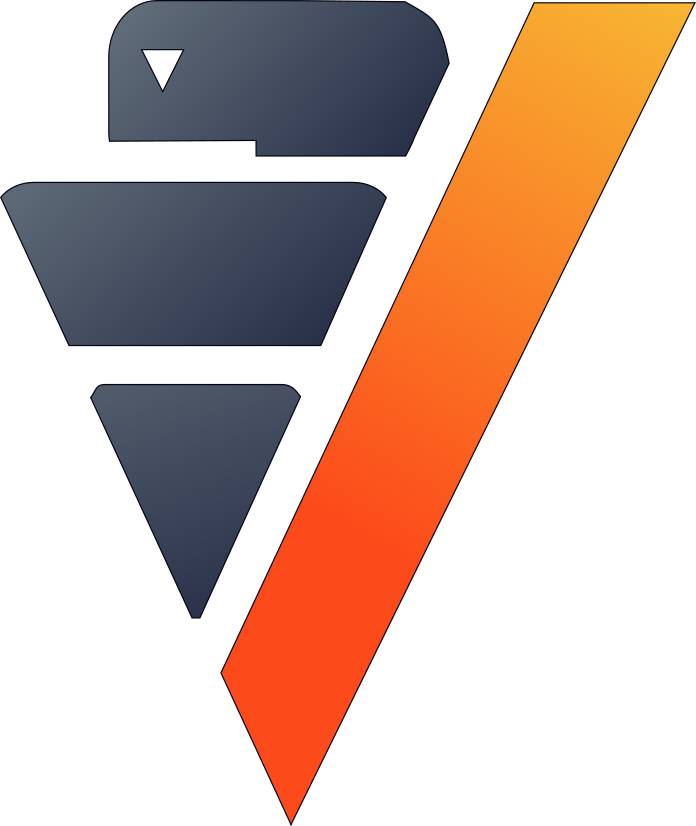

In [8]:
from verticapy.learn.svm import LinearSVC
from verticapy.learn.model_selection import cross_validate

predictors = ["Petal_Length", "ratio_swl"]
response = "Species_setosa"
model = LinearSVC("svc_setosa_iris")
model.drop()
cross_validate(model, iris, predictors, response)

Our model is excellent. Let's build it using the entire dataset.

In [9]:
model.fit(iris, predictors, response)



details
 predictor  |coefficient
------------+-----------
 Intercept  |  1.37958  
petal_length| -0.83883  
 ratio_swl  |  1.32448  


call_string
SELECT svm_classifier('public.svc_setosa_iris', '"public"._VERTICAPY_TEMPORARY_VIEW_dbadmin_30702', '"species_setosa"', '"Petal_Length", "ratio_swl"'
USING PARAMETERS class_weights='none', C=1, max_iterations=100, intercept_mode='regularized', intercept_scaling=1, epsilon=0.0001);

Additional Info
       Name       |Value
------------------+-----
accepted_row_count| 150 
rejected_row_count|  0  
 iteration_count  |  7  

Let's plot the model to see the perfect separation.

<AxesSubplot:title={'center':'svm("Petal_Length", "ratio_swl")'}, xlabel='"Petal_Length"', ylabel='"ratio_swl"'>

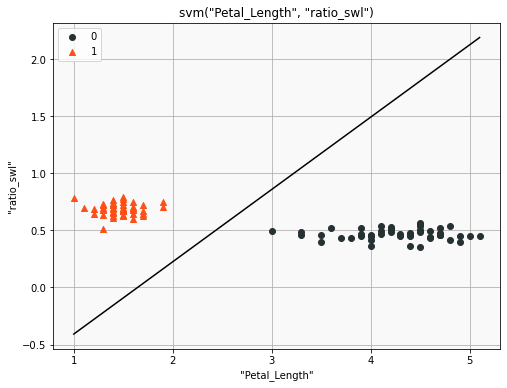

In [10]:
model.plot()

We can add this prediction to the Virtual Dataframe.

,"123idNumeric(3,0)",123Sepal_LengthFloat,123Sepal_WidthFloat,123Petal_LengthFloat,123Petal_WidthFloat,AbcSpeciesVarchar(10),123Species_setosaBool,123Species_versicolorBool,123Species_virginicaBool,123ratio_pwlFloat,123ratio_swlFloat,123setosaFloat
1,1.0,5.1,3.5,1.4,0.2,setosa,1,0,0,0.142857142857143,0.686274509803922,0.752904193365622
2,2.0,4.9,3.0,1.4,0.2,setosa,1,0,0,0.142857142857143,0.612244897959184,0.734214457506012
3,3.0,4.7,3.2,1.3,0.2,setosa,1,0,0,0.153846153846154,0.680851063829787,0.766895205087123
4,4.0,4.6,3.1,1.5,0.2,setosa,1,0,0,0.133333333333333,0.673913043478261,0.733783854737793
5,5.0,5.0,3.6,1.4,0.2,setosa,1,0,0,0.142857142857143,0.72,0.761120135037833
6,6.0,5.4,3.9,1.7,0.4,setosa,1,0,0,0.235294117647059,0.722222222222222,0.713025422561916
7,7.0,4.6,3.4,1.4,0.3,setosa,1,0,0,0.214285714285714,0.739130434782609,0.765696436685413
8,8.0,5.0,3.4,1.5,0.2,setosa,1,0,0,0.133333333333333,0.68,0.73535576108104
9,9.0,4.4,2.9,1.4,0.2,setosa,1,0,0,0.142857142857143,0.659090909090909,0.746145209780933
10,10.0,4.9,3.1,1.5,0.1,setosa,1,0,0,0.0666666666666667,0.63265306122449,0.722973240575228

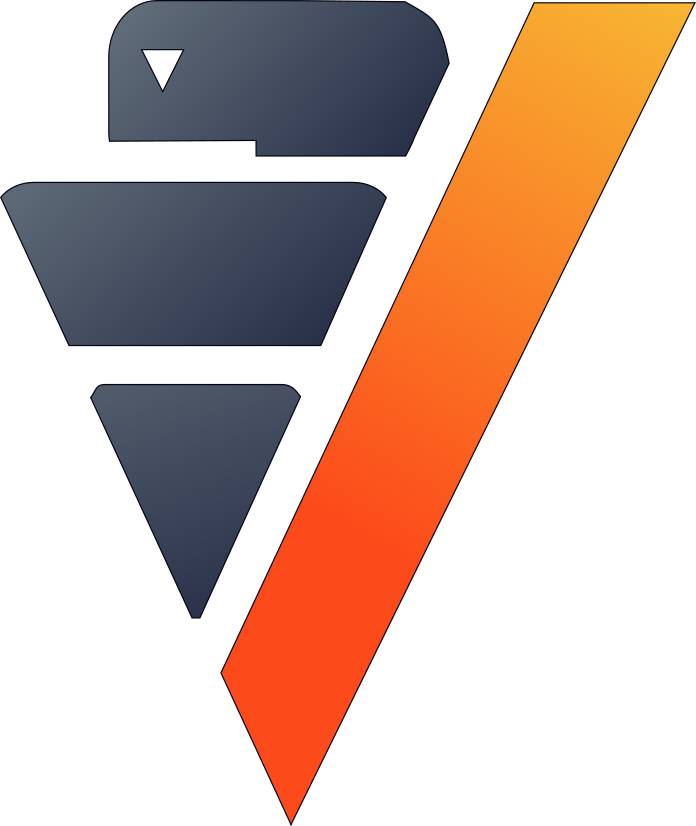

In [11]:
model.predict(iris, name = "setosa")

Let's create a model to classify the Iris virginica.

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi
1-fold,0.9906976744186046,0.9736719816131579,0.9482758620689655,0.117468619213426,0.8333333333333334,1.0,0.963855421686747,0.8804509063256237,0.9302325581395348,0.8333333333333335,0.8333333333333334
2-fold,0.9972222222222226,0.9938176050147153,0.9827586206896551,0.104322595078361,0.9473684210526315,1.0,0.9873417721518987,0.9610849132757813,0.9750000000000001,0.9473684210526314,0.9473684210526315
3-fold,0.9999999999999999,0.9999999999999999,1.0,0.096523057782062,1.0,1.0,1.0,1.0,1.0,1.0,1.0
avg,0.9959732988802756,0.9891631955426243,0.9770114942528736,0.10610475735794966,0.9269005847953217,1.0,0.9837323979462153,0.9471786065338017,0.9684108527131783,0.9269005847953217,0.9269005847953217
std,0.004775266740310461,0.01376730851310049,0.026336641925033558,0.010585896878009548,0.08519767417738866,0.0,0.0183406194545934,0.060975695772928405,0.03534737094062192,0.08519767417738858,0.08519767417738866

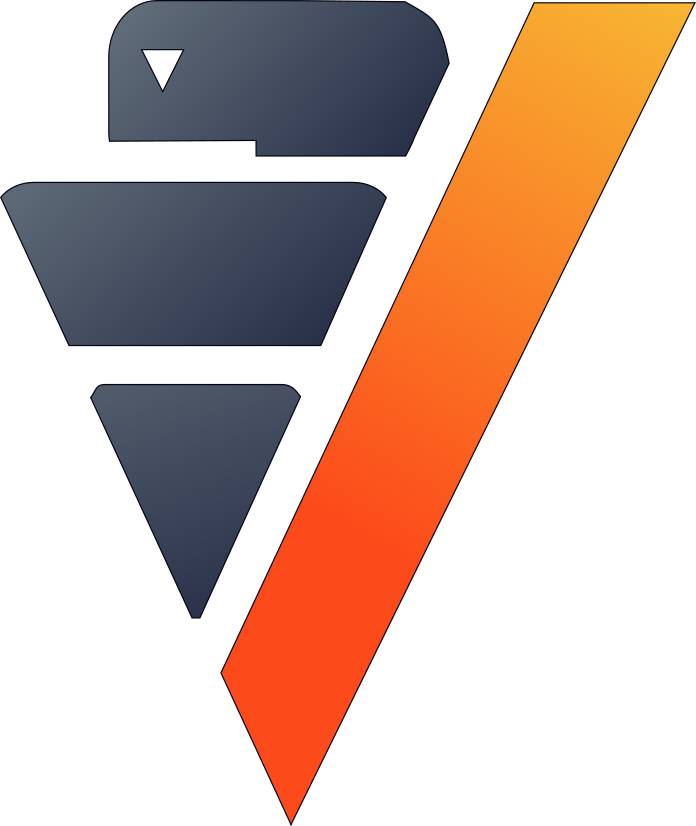

In [12]:
predictors = ["Petal_Length", "Sepal_Length", "Sepal_Width", 
              "Petal_Width", "ratio_pwl", "ratio_swl"]
response = "Species_virginica"
model = LinearSVC("svc_virginica_iris")
model.drop()
cross_validate(model, iris, predictors, response)

We have another excellent model. Let's add it to the Virtual Dataframe.

,"123idNumeric(3,0)",123Sepal_LengthFloat,123Sepal_WidthFloat,123Petal_LengthFloat,123Petal_WidthFloat,AbcSpeciesVarchar(10),123Species_setosaBool,123Species_versicolorBool,123Species_virginicaBool,123ratio_pwlFloat,123ratio_swlFloat,123setosaFloat,123virginicaFloat
1,1.0,5.1,3.5,1.4,0.2,setosa,1,0,0,0.142857142857143,0.686274509803922,0.752904193365622,0.000729625753874474
2,2.0,4.9,3.0,1.4,0.2,setosa,1,0,0,0.142857142857143,0.612244897959184,0.734214457506012,0.00140586095614843
3,3.0,4.7,3.2,1.3,0.2,setosa,1,0,0,0.153846153846154,0.680851063829787,0.766895205087123,0.0011623124186077
4,4.0,4.6,3.1,1.5,0.2,setosa,1,0,0,0.133333333333333,0.673913043478261,0.733783854737793,0.00183034641647714
5,5.0,5.0,3.6,1.4,0.2,setosa,1,0,0,0.142857142857143,0.72,0.761120135037833,0.000711446315773626
6,6.0,5.4,3.9,1.7,0.4,setosa,1,0,0,0.235294117647059,0.722222222222222,0.713025422561916,0.0008412706475108
7,7.0,4.6,3.4,1.4,0.3,setosa,1,0,0,0.214285714285714,0.739130434782609,0.765696436685413,0.00139698261379007
8,8.0,5.0,3.4,1.5,0.2,setosa,1,0,0,0.133333333333333,0.68,0.73535576108104,0.000999687134331803
9,9.0,4.4,2.9,1.4,0.2,setosa,1,0,0,0.142857142857143,0.659090909090909,0.746145209780933,0.00227048688228728
10,10.0,4.9,3.1,1.5,0.1,setosa,1,0,0,0.0666666666666667,0.63265306122449,0.722973240575228,0.00122461091659491

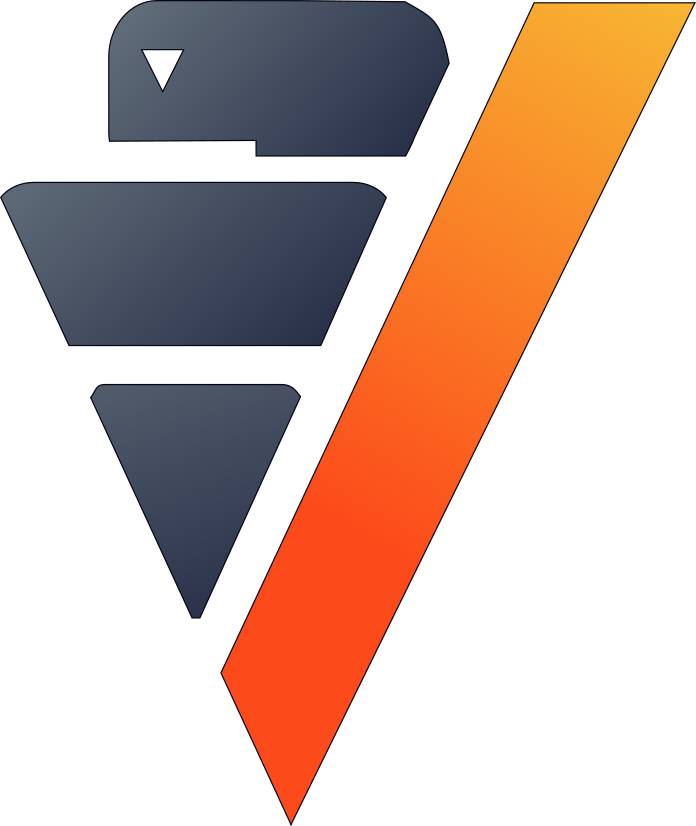

In [13]:
model.fit(iris, predictors, response)
model.predict(iris, name = "virginica")

Let's evaluate our final model (combination of 2 Linear SVC)

In [14]:
iris.case_when("prediction",
               iris["setosa"] > 0.5, 'setosa',
               iris["virginica"] > 0.5, 'virginica',
               'versicolor')
iris["score"] = (iris["Species"] == iris["prediction"])
iris["score"].avg()

0.98

We have a great model with an accuracy of 98% on an entirely balanced dataset.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!